In [1]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000

# Create moons
X, y = make_moons(n_samples,
                    noise=0.03,
                    random_state=29)

In [2]:
# Make dataframe of features and labels
import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons.head()

,X0,X1,label
0,1.277564,-0.489009,1
1,2.011463,0.283512,1
2,1.280953,-0.460921,1
3,0.650115,-0.400103,1
4,0.100327,0.043960,1


In [3]:
# Build train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [4]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(29)

# Create a model
model= tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

In [5]:
# Evaluate the model on the test
loss_train, accur_train = model.evaluate(X_train, y_train)
loss_test, accur_test = model.evaluate(X_test, y_test)

print(f'Final accuracy training:{100*accur_train:.2f}%, final loss training {loss_train}')
print(f'Final accuracy test:{100*accur_test:.2f}%, final loss test {loss_test}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3316e-07  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.1587e-07  
Final accuracy training:100.00%, final loss training 2.6619935056260147e-07
Final accuracy test:100.00%, final loss test 9.738834023664822e-07


/tmp/ipython-input-1481186850.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


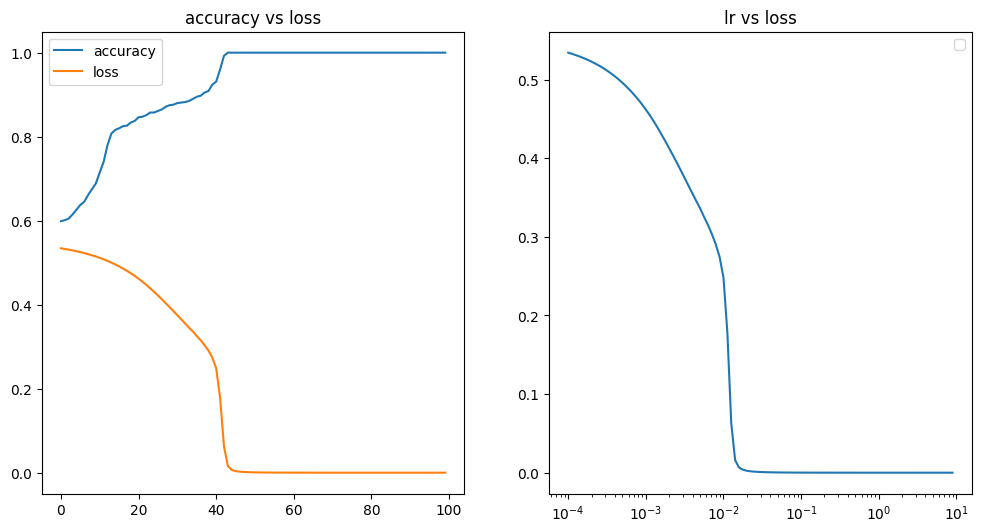

In [6]:
import matplotlib.pyplot as plt
# Plot the  curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("accuracy vs loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("lr vs loss")
plt.semilogx((history.history)["learning_rate"], history.history["loss"]) # log scale
plt.legend()

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # entre x_min y x_max generar 100
                       np.linspace(y_min, y_max, 100))  # shpae (100 del primer np.linspace, 100)

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]
  # When you call xx.ravel(), it takes the array xx and returns a 1D array containing all the elements of xx in a single row

  # Make predictions using the trained model
  y_pred = model.predict(x_in)# x_in son coordenadas de los puntos, coordenadas en x y y . Nada que ver con la y a predecir.

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
  #  The [-1] index refers to the last dimension of the output shape, which often
  # represents the number of units or classes in the output layer.
  # particularly useful in classification problems where the last dimension corresponds to the number of classes.

    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    # returns the indices of the maximum values along the specified axis. In the context of predictions
  else:
    print("doing binary classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    #  find the highest predicted probability for each sample

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.PiYG, alpha=0.7)# alpha es la opacidad del background
  # xx represents the x-coordinates of the grid.yy represents the y-coordinates of the grid.
  # y_pred contains the predicted class labels for each point in the grid.
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.PiYG)# each marker will have a size of 40
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  """Function adapted/taken from:1.CS231n - https://cs231n.github.io/neural-networks-case-study/,
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  3. Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke """

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification...


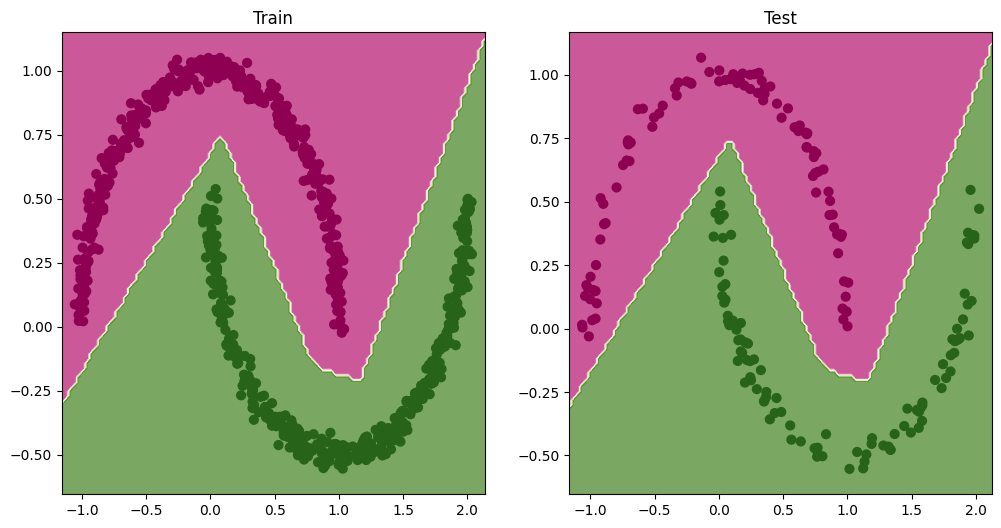

In [8]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

In [9]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[ 98,   0],
       [  0, 102]])

'Function adapted/taken from:1.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html,\n  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb\n  3. Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke '

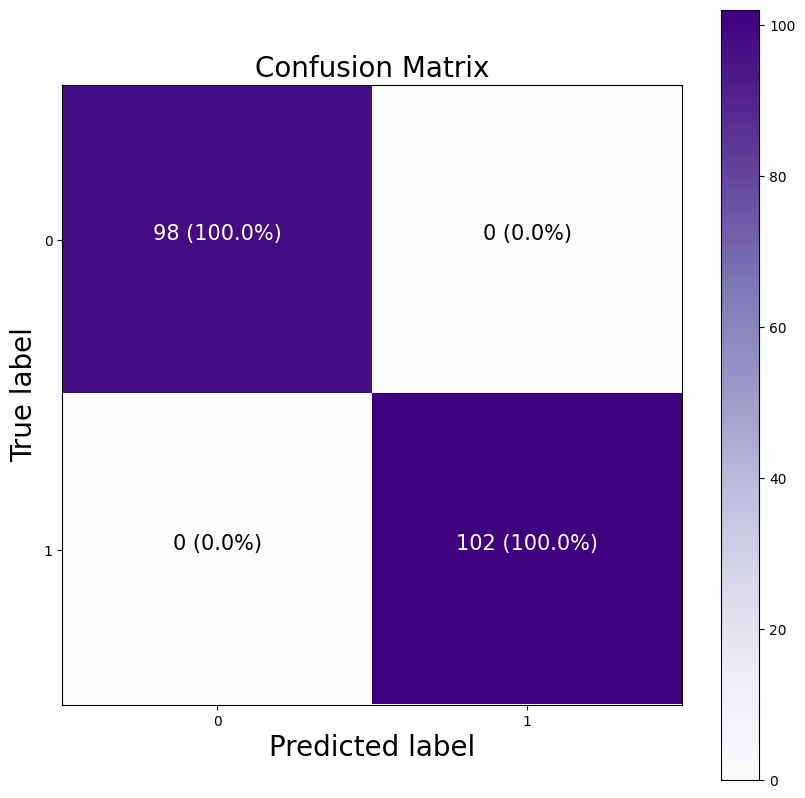

In [10]:
# Plot confusion matrix function
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it.
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Purples)
# ax.matshow() creates a matrix plot of the confusion matrix cm
fig.colorbar(cax) # Adds a color bar to the plot

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom() # move the x-axis ticks to the bottom of the plot

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
# range(cm.shape[0]) generates a range of row indices, and range(cm.shape[1]) generates a range of column indices. itertools.product creates a Cartesian product of these two ranges,
 # which means it generates all possible pairs of row and column indices
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             # This line of code is adding text annotations to the plot at the position (j, i).
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
"""Function adapted/taken from:1.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html,
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  3. Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke """